In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [75]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [76]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [80]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [81]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [82]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [83]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [84]:
train['Embarked'].fillna('S', inplace=True)

In [85]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [86]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [87]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

Selecting random ages for the missing values of age.

In [88]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [89]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [90]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_15176\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [91]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [92]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_15176\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [93]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [94]:
# EDA

train.groupby(['Pclass'])['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [95]:
train.groupby(['Sex'])['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [96]:
train.groupby(['Embarked'])['Survived'].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

In [97]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_15176\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

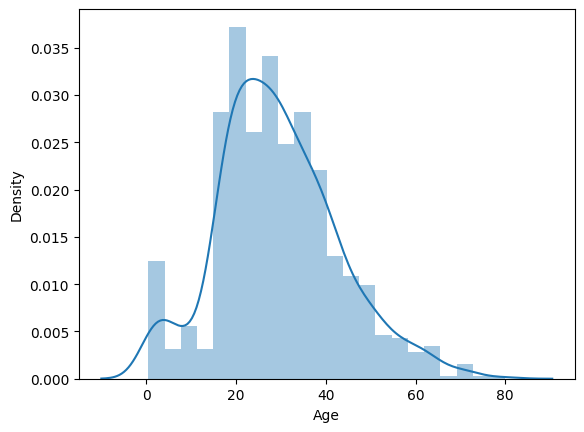

In [98]:
sns.distplot(train['Age'])

C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_15176\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_15176\3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train

<AxesSubplot:xlabel='Age', ylabel='Density'>

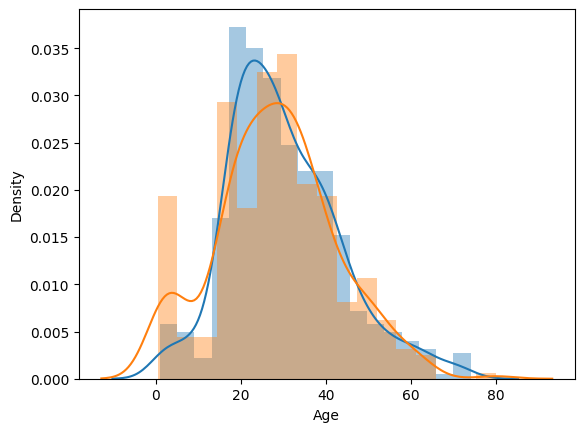

In [99]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_15176\2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\Avinash Kumar\AppData\Local\Temp\ipykernel_15176\2626582821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][tra

<AxesSubplot:xlabel='Fare', ylabel='Density'>

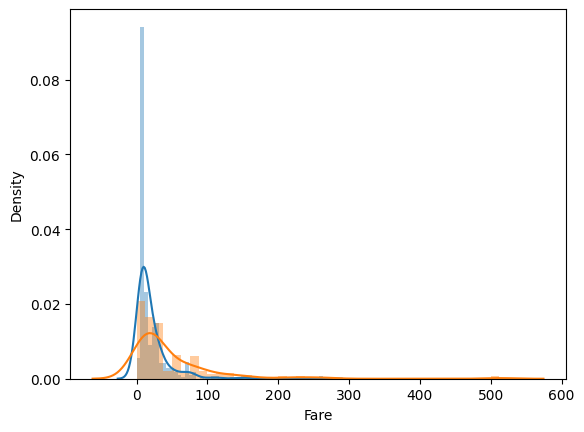

In [100]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [101]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [102]:
train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)

In [103]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [104]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [105]:
train['Family']=train['SibSp']+train['Parch']+1

In [106]:
test['Family']=test['SibSp']+test['Parch']+1

In [107]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [108]:
train.groupby(['Family'])['Survived'].mean()*100

Family
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [109]:
def cal(num):
    if num==1:
        return 'Alone'
    elif num>1 and num<5:
        return 'Medium'
    else:
        return 'Large'

In [110]:
train['Family_Size']=train['Family'].apply(cal)

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [112]:
test['Family_Size']=test['Family'].apply(cal)

In [113]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Medium


In [114]:
train.drop(columns=['SibSp', 'Parch', 'Family'], inplace=True)
test.drop(columns=['SibSp', 'Parch', 'Family'], inplace=True)

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    object 
 7   Family_Size  418 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 26.2+ KB


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Family_Size  891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [117]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [118]:
passenger_id=test['PassengerId'].values

In [119]:
train.drop(columns=['Name', 'PassengerId', 'Fare'], inplace=True)
test.drop(columns=['Name','PassengerId', 'Fare'], inplace=True)

In [120]:
train

,Survived,Pclass,Sex,Age,Embarked,Family_Size
0,0,3,male,22.0,S,Medium
1,1,1,female,38.0,C,Medium
2,1,3,female,26.0,S,Alone
3,1,1,female,35.0,S,Medium
4,0,3,male,35.0,S,Alone
...,...,...,...,...,...,...
886,0,2,male,27.0,S,Alone
887,1,1,female,19.0,S,Alone
888,0,3,female,15.0,S,Medium
889,1,1,male,26.0,C,Alone


In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Embarked     891 non-null    object 
 5   Family_Size  891 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB


In [122]:
print(train.shape)
print(test.shape)

(891, 6)
(418, 5)


In [123]:
train=pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked', 'Family_Size'], drop_first=True)

In [124]:
train.shape

(891, 9)

In [125]:
test=pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked', 'Family_Size'], drop_first=True)

In [126]:
test.shape

(418, 8)

In [127]:
train

,Survived,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Size_Large,Family_Size_Medium
0,0,22.0,0,1,1,0,1,0,1
1,1,38.0,0,0,0,0,0,0,1
2,1,26.0,0,1,0,0,1,0,0
3,1,35.0,0,0,0,0,1,0,1
4,0,35.0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0,27.0,1,0,1,0,1,0,0
887,1,19.0,0,0,0,0,1,0,0
888,0,15.0,0,1,0,0,1,0,1
889,1,26.0,0,0,1,0,0,0,0


In [238]:
X=train.drop(columns='Survived').values
y=train['Survived'].values

In [239]:
X

array([[22.,  0.,  1., ...,  1.,  0.,  1.],
       [38.,  0.,  0., ...,  0.,  0.,  1.],
       [26.,  0.,  1., ...,  1.,  0.,  0.],
       ...,
       [15.,  0.,  1., ...,  1.,  0.,  1.],
       [26.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  0.,  1., ...,  0.,  0.,  0.]])

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state=0)

In [224]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [225]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [226]:
y_pred=classifier.predict(X_test)

In [227]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8268156424581006

In [228]:
Xf=test.iloc[:,:].values

In [229]:
y_final=classifier.predict(Xf)

In [230]:
y_final.shape

(418,)

In [231]:
passenger_id.shape

(418,)

In [232]:
final=pd.DataFrame()

In [233]:
final['PassengerID']=passenger_id
final['Survived']=y_final

In [140]:
final

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = survived
#submission.to_csv('submission.csv', index=False)